In [79]:
import pandas as pd
import missingno as msno

In [80]:
df = pd.read_excel('Datos/Originales/información_prestamos.xlsx')

In [81]:
df.dtypes


ID                       object
Edad                      int64
Ingresos                  int64
Monto_Inicial             int64
Scoring_Crediticio        int64
Meses_Empleo              int64
Num_Creditos              int64
Ratio_Interes           float64
Duracion                  int64
Ratio_Deuda_Ingresos    float64
Estudios                 object
Tipo_Jornada_Laboral     object
Estado_Civil             object
Posesion_Hipoteca         int64
Personas_Cargo            int64
Proposito                object
Fiador                    int64
Impago                    int64
Prima                   float64
dtype: object

<Axes: >

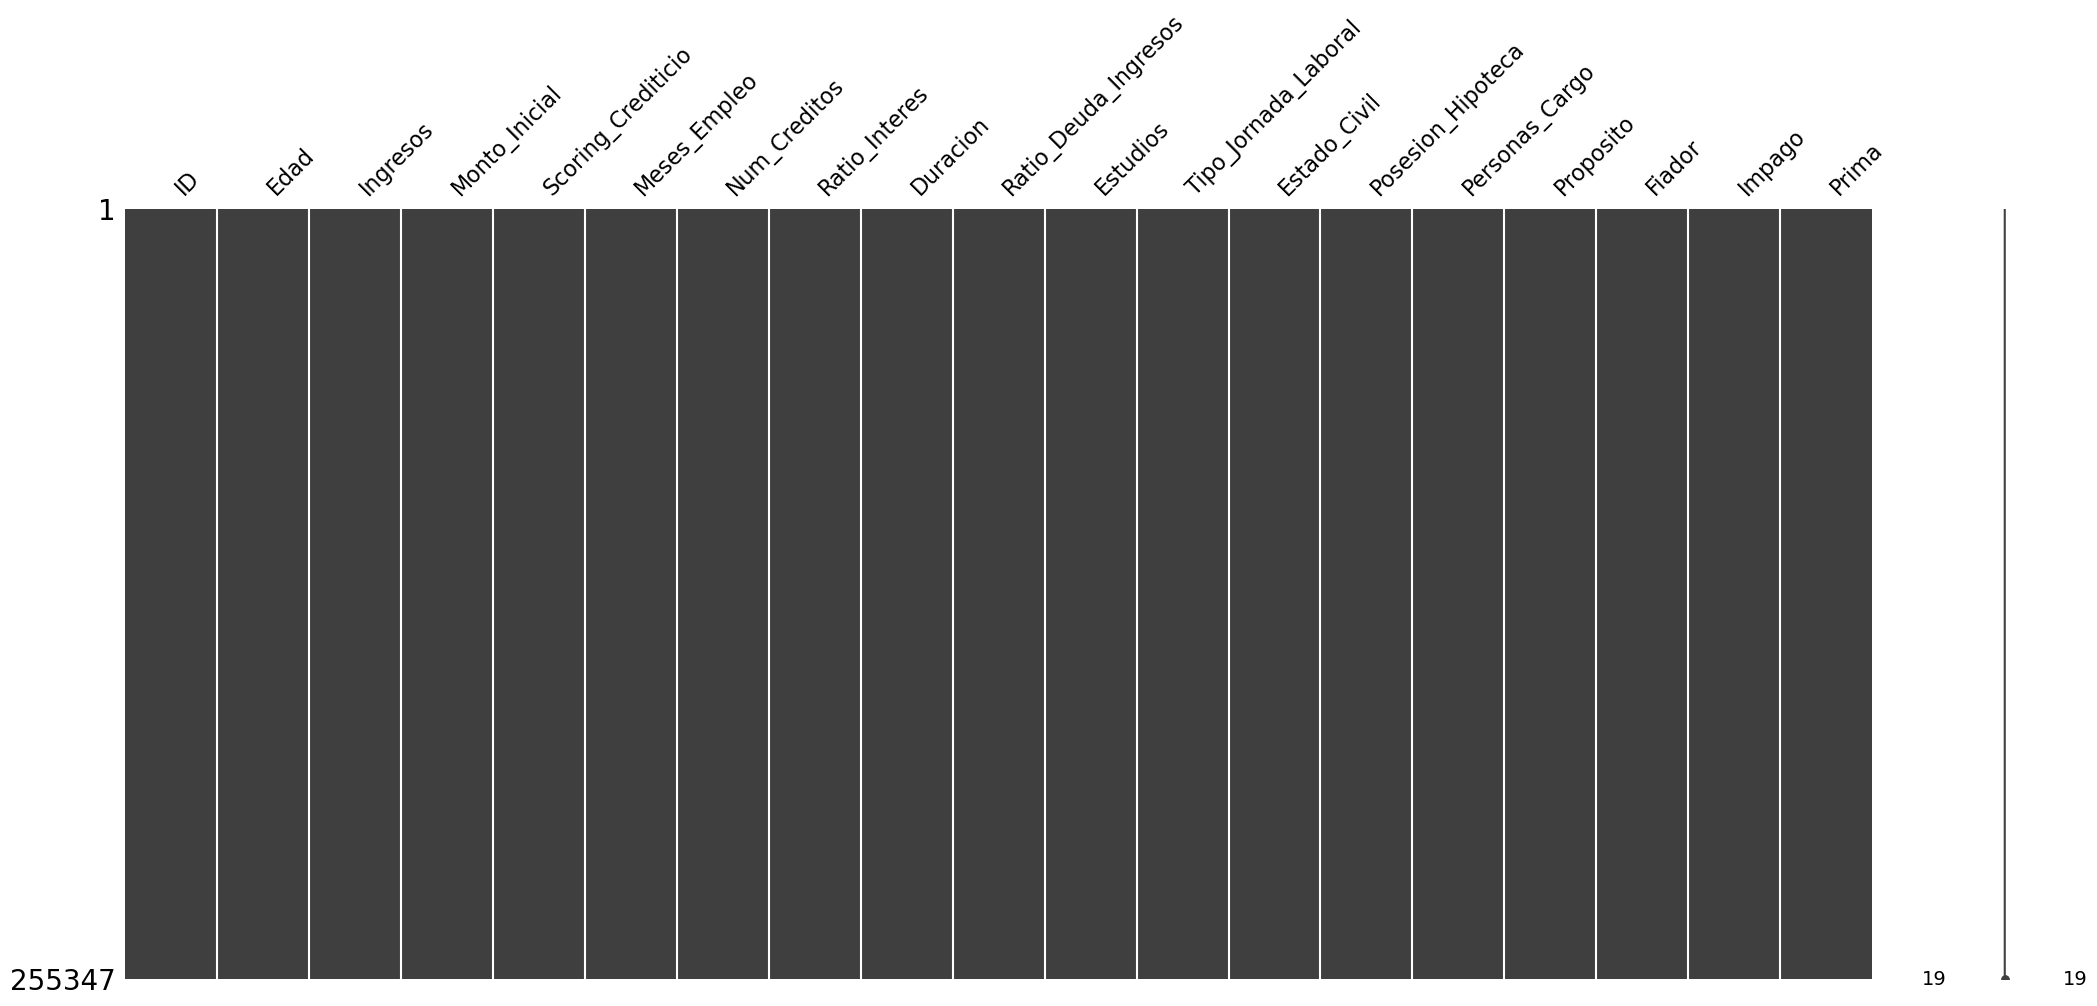

In [82]:
msno.matrix(df)

In [83]:
df.head()

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,Tipo_Jornada_Laboral,Estado_Civil,Posesion_Hipoteca,Personas_Cargo,Proposito,Fiador,Impago,Prima
0,S97R7X,18,61628,83011,397,113,1,8.06,48,0.45,Doctorado,Autónomo,Casado,1,0,Automóvil,0,0,155.80
1,T3ZE0N,69,19485,25474,784,46,2,15.04,48,0.15,Grado Universitario,Tiempo parcial,Soltero,0,1,Educación,0,0,24.20
2,RLGTBY,50,82410,68642,486,14,3,21.96,12,0.71,Escolar,Tiempo parcial,Divorciado,1,0,Automóvil,1,1,58.33
3,BZ86CV,64,132974,208339,308,10,1,24.26,12,0.61,Máster,Desempleado,Casado,1,0,Negocios,1,0,284.46
4,5OD75M,62,51411,113847,412,47,2,5.73,36,0.70,Grado Universitario,Autónomo,Casado,0,0,Negocios,0,0,101.77


In [84]:
df["Estudios"].unique()
df["Proposito"].unique()

array(['Automóvil', 'Educación', 'Negocios', 'Vivienda', 'Otros'],
      dtype=object)

In [85]:
df_auto=df[df["Proposito"]=="Automóvil"]

In [86]:
df_auto.describe()  #minimo de 18 años #meses de empleo 0???? 

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Posesion_Hipoteca,Personas_Cargo,Fiador,Impago,Prima
count,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.00000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000
mean,43.546515,82508.299504,127857.908721,574.575918,59.651090,2.496204,13.467197,36.004248,0.50122,0.503344,0.500865,0.503186,0.118814,133.959505
std,15.039088,38985.377101,70789.034786,159.133466,34.759381,1.119726,6.634673,17.003908,0.23109,0.499994,0.500004,0.499995,0.323573,86.805912
min,18.000000,15016.000000,5020.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.10000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,48702.750000,66268.750000,437.000000,30.000000,1.000000,7.740000,24.000000,0.30000,0.000000,0.000000,0.000000,0.000000,63.207500
50%,43.000000,82639.000000,128401.500000,573.000000,60.000000,2.000000,13.420000,36.000000,0.50000,1.000000,1.000000,1.000000,0.000000,122.400000
75%,57.000000,116094.750000,189338.000000,713.000000,90.000000,4.000000,19.230000,48.000000,0.70000,1.000000,1.000000,1.000000,0.000000,187.742500
max,69.000000,149996.000000,249988.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.90000,1.000000,1.000000,1.000000,1.000000,726.330000


In [87]:
#df_auto["Ratio_Interes"] = df_auto["Ratio_Interes"] / 100 #pasar a %



In [88]:
df_auto=pd.get_dummies(df_auto,columns=["Proposito","Estudios","Tipo_Jornada_Laboral","Estado_Civil","Duracion"])
df_auto.head()

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60
0,S97R7X,18,61628,83011,397,113,1,8.06,0.45,1,...,False,False,True,False,False,False,False,False,True,False
2,RLGTBY,50,82410,68642,486,14,3,21.96,0.71,1,...,False,True,False,True,False,True,False,False,False,False
8,SKE2P9,37,110810,101859,765,115,3,11.20,0.40,1,...,False,True,False,True,False,False,False,False,False,True
9,E2FB1D,56,16815,157551,643,108,1,21.24,0.72,0,...,False,False,False,False,True,False,True,False,False,False
13,TKSCGH,35,42315,180635,645,114,3,16.95,0.50,1,...,True,False,True,False,False,True,False,False,False,False


In [91]:
df_auto.to_csv("Datos/Transformados/df_limpio.csv",index=False)

In [92]:
df_auto.shape

(50844, 32)

In [93]:
anomalia_doctorado = df_auto[(df_auto['Edad'] < 25) & (df_auto['Estudios_Doctorado'] == True)].copy()
display(anomalia_doctorado)

df_limpio = df_auto.drop(anomalia_doctorado.index)
df_limpio

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60,max_meses_empleo_posible
0,S97R7X,18,61628,83011,397,113,1,8.06,0.45,1,...,False,True,False,False,False,False,False,True,False,24
29,ABRPBC,19,64395,166840,381,78,1,5.47,0.79,0,...,False,False,True,False,False,False,True,False,False,36
129,8E7TLZ,22,27735,11408,558,89,2,10.21,0.72,0,...,False,False,False,True,False,False,False,True,False,72
248,ZNGZF6,23,39802,78432,424,115,2,24.23,0.88,1,...,False,False,False,True,True,False,False,False,False,84
568,KJWXUL,23,147925,44664,708,30,2,11.73,0.18,1,...,False,False,False,True,False,True,False,False,False,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255082,XUK65I,24,23224,6958,764,73,1,2.63,0.85,0,...,False,False,True,False,False,False,False,False,True,96
255098,IG11OF,20,60305,115630,334,102,3,15.64,0.29,1,...,False,True,False,False,True,False,False,False,False,48
255111,JFYZFE,21,70803,67322,656,8,2,17.71,0.84,0,...,False,True,False,False,True,False,False,False,False,60
255158,DZ3DYI,18,42486,228047,475,20,2,19.11,0.13,1,...,False,False,True,False,False,True,False,False,False,24


,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60,max_meses_empleo_posible
2,RLGTBY,50,82410,68642,486,14,3,21.96,0.71,1,...,True,False,True,False,True,False,False,False,False,408
8,SKE2P9,37,110810,101859,765,115,3,11.20,0.40,1,...,True,False,True,False,False,False,False,False,True,252
9,E2FB1D,56,16815,157551,643,108,1,21.24,0.72,0,...,False,False,False,True,False,True,False,False,False,480
13,TKSCGH,35,42315,180635,645,114,3,16.95,0.50,1,...,False,True,False,False,True,False,False,False,False,228
17,8CI0EZ,46,99515,164417,501,98,3,17.82,0.21,0,...,False,True,False,False,False,False,False,True,False,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255320,G5QJ7O,54,129974,22870,501,42,3,22.44,0.14,0,...,False,False,True,False,False,False,True,False,False,456
255323,FKB7Z1,35,100578,77233,378,38,4,18.21,0.53,0,...,False,True,False,False,False,False,False,False,True,228
255324,O5PRET,57,118190,74637,645,93,4,18.84,0.38,0,...,False,False,True,False,False,True,False,False,False,492
255335,WZEOVA,53,51976,153328,400,88,1,3.35,0.61,0,...,False,False,True,False,True,False,False,False,False,444


In [94]:
df_limpio['max_meses_empleo_posible'] = (df_limpio['Edad'] - 16) * 12
anomalia_empleo = df_limpio[df_limpio['Meses_Empleo'] > df_limpio['max_meses_empleo_posible']].copy()
display(anomalia_empleo)

df_limpio=df_limpio.drop(anomalia_empleo.index)
df_limpio

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60,max_meses_empleo_posible
89,JVJC0O,21,79427,55330,810,73,2,10.14,0.56,1,...,False,False,True,False,True,False,False,False,False,60
232,FIYZUG,21,62791,112253,596,62,2,21.23,0.78,1,...,True,True,False,False,False,False,True,False,False,60
256,H7EHS3,18,91169,50335,515,100,2,15.69,0.46,1,...,False,False,True,False,False,False,False,False,True,24
410,ZFAJCH,18,146018,68632,313,42,4,11.01,0.63,0,...,False,False,False,True,False,False,False,True,False,24
467,SF4RRD,23,130478,128851,319,113,3,10.63,0.75,1,...,False,False,True,False,False,True,False,False,False,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254849,EPP48A,18,113137,246822,543,100,4,17.54,0.63,0,...,False,True,False,False,False,False,False,True,False,24
254934,X9KGGY,18,17956,163065,305,55,1,8.08,0.46,1,...,True,False,False,True,False,False,False,False,True,24
254972,ZCQTVB,18,20445,117961,827,95,2,19.62,0.75,1,...,False,False,True,False,False,False,True,False,False,24
255129,EEKEL7,20,58492,223452,327,53,4,4.56,0.57,1,...,False,True,False,False,False,False,True,False,False,48


,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60,max_meses_empleo_posible
2,RLGTBY,50,82410,68642,486,14,3,21.96,0.71,1,...,True,False,True,False,True,False,False,False,False,408
8,SKE2P9,37,110810,101859,765,115,3,11.20,0.40,1,...,True,False,True,False,False,False,False,False,True,252
9,E2FB1D,56,16815,157551,643,108,1,21.24,0.72,0,...,False,False,False,True,False,True,False,False,False,480
13,TKSCGH,35,42315,180635,645,114,3,16.95,0.50,1,...,False,True,False,False,True,False,False,False,False,228
17,8CI0EZ,46,99515,164417,501,98,3,17.82,0.21,0,...,False,True,False,False,False,False,False,True,False,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255320,G5QJ7O,54,129974,22870,501,42,3,22.44,0.14,0,...,False,False,True,False,False,False,True,False,False,456
255323,FKB7Z1,35,100578,77233,378,38,4,18.21,0.53,0,...,False,True,False,False,False,False,False,False,True,228
255324,O5PRET,57,118190,74637,645,93,4,18.84,0.38,0,...,False,False,True,False,False,True,False,False,False,492
255335,WZEOVA,53,51976,153328,400,88,1,3.35,0.61,0,...,False,False,True,False,True,False,False,False,False,444


In [95]:
anomalia_meses_empleo = df_limpio[(df_limpio['Meses_Empleo']==0) & (df_limpio["Fiador"]==0)].copy()
display(anomalia_meses_empleo)

df_limpio=df_limpio.drop(anomalia_meses_empleo.index)

df_limpio

,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60,max_meses_empleo_posible
759,L1E8BY,49,25819,46478,430,0,1,2.53,0.17,1,...,False,False,True,False,False,False,False,True,False,396
1382,XASTOL,56,127854,214532,805,0,3,6.06,0.14,0,...,False,True,False,False,False,False,False,False,True,480
2690,P73WC4,42,34320,14935,763,0,2,14.92,0.41,0,...,False,True,False,False,False,True,False,False,False,312
3555,V2BXV0,31,78064,26196,302,0,3,19.81,0.50,0,...,False,True,False,False,False,False,False,True,False,180
3746,HXFB75,28,92095,226020,791,0,1,9.57,0.87,1,...,False,False,False,True,False,True,False,False,False,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240915,33N4PA,30,30091,42662,785,0,1,2.76,0.36,0,...,True,True,False,False,False,False,False,True,False,168
242208,QCEFM0,53,54777,207702,800,0,4,24.88,0.46,0,...,False,True,False,False,False,False,False,True,False,444
242544,W21UYL,55,88141,196182,668,0,1,17.26,0.14,0,...,False,False,True,False,False,False,False,True,False,468
245892,D9B48C,47,140265,112396,327,0,2,8.44,0.32,1,...,False,False,False,True,False,True,False,False,False,372


,ID,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Ratio_Deuda_Ingresos,Posesion_Hipoteca,...,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Duracion_12,Duracion_24,Duracion_36,Duracion_48,Duracion_60,max_meses_empleo_posible
2,RLGTBY,50,82410,68642,486,14,3,21.96,0.71,1,...,True,False,True,False,True,False,False,False,False,408
8,SKE2P9,37,110810,101859,765,115,3,11.20,0.40,1,...,True,False,True,False,False,False,False,False,True,252
9,E2FB1D,56,16815,157551,643,108,1,21.24,0.72,0,...,False,False,False,True,False,True,False,False,False,480
13,TKSCGH,35,42315,180635,645,114,3,16.95,0.50,1,...,False,True,False,False,True,False,False,False,False,228
17,8CI0EZ,46,99515,164417,501,98,3,17.82,0.21,0,...,False,True,False,False,False,False,False,True,False,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255320,G5QJ7O,54,129974,22870,501,42,3,22.44,0.14,0,...,False,False,True,False,False,False,True,False,False,456
255323,FKB7Z1,35,100578,77233,378,38,4,18.21,0.53,0,...,False,True,False,False,False,False,False,False,True,228
255324,O5PRET,57,118190,74637,645,93,4,18.84,0.38,0,...,False,False,True,False,False,True,False,False,False,492
255335,WZEOVA,53,51976,153328,400,88,1,3.35,0.61,0,...,False,False,True,False,True,False,False,False,False,444
